# Estimadores baseados em Imputação e o *Outcome Regression*

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Introdução aos estimadores baseados em Imputação
* Outcome Regression
  * Unilateral
  * Bilateral
* Aplicação no Python
  * Outcome Regression
  * Aplicação no Python 1 
  * 
* Boas Práticas


## Referências

* Heckman, James, Hidehiko Ichimura, Jefrey Smith, and Petra Todd. (1998). Characterizing selection bias using experimental data". Econometrica 66.5, pp. 1017-1098.
* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Courthoud, Matteo. Understanding AIPW. https://matteocourthoud.github.io/post/aipw/ 
* Matheus Facure. Doubly Robust Estimation. https://matheusfacure.github.io/python-causality-handbook/12-Doubly-Robust-Estimation.html
* Pearl, J. (2000). Causality: Models, reasoning, and inference. Cambridge University Press.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Morgan, S. L., & Winship, C. (2014). Counterfactuals and causal inference: Methods and principles for social research. Cambridge University Press. Capítulo 3.


## Introdução

Lembre que nossa busca é a identificação do parâmetro causal. Devido ao **problema fundamental da inferência causal**: 

$$ Y_{i} = D Y^{1}_{i} + (1-D)Y^{0}_{i} $$

rearrajando a equação, temos:

$$ Y_{i} = Y^{0}_{i} + (Y^{1}_{i} - Y^{0}_{i})D $$

Essa segunda equação nos oference "insights" importantes, repare que $(Y^{1}_{i} - Y^{0}_{i})$ é o efeito do tratamento no nível do indivíduo, chamamos à isso de ***Individual Treatment Effect***. Vamos definir o ITE como $\tau_{i}$.

$$ Y_{i} = Y^{0}_{i} + \tau_{i} D $$

A interpretação direta é que o resultado do individuo *i* será o estado da natureza de não tratado ($Y^{0}$) mais (ou menos) o efeito do tratamento individual ($\tau_{i}$), caso o indivíduo seja tratado ($D=1$). Essa estrutura é fundamentada na consideração explicita do contrafactual (temos os dois estados do mundo considerados para cada indivíduo).

***Estrutura dos Dados Reais***

A prática do problema fundamental da inferencia causal é que não podemos observar o resultado de um indivíduo sendo tratado e não-tratado simultaneamente. Logo, nossa estrutura de dados implica em **dados faltantes**. Um dos estados da natureza está "faltante no nosso banco de dados.

Vamos considerar um exemplo simples para ilustrar o problema. Suponha que temos um conjunto de dados com as seguintes variáveis:


| Unidade |   $Y^{1}$     |  $Y^{0}$     | $D$      |  $X $    |
|---------|--------|-------|--------|-------|
| 1       | 5      |       | 1      | 11    |
| 2       | 2      |       | 1      | 7     |
| 3       | 10     |       | 1      | 5     |
| 4       | 6      |       | 1      | 3     |
| 5       |        | 4     | 0      | 10    |
| 6       |        | 0     | 0      | 8     |
| 7       |        | 5     | 0      | 4     |
| 8       |        | 1     | 0      |  1    |


Repare que quando os indivíduos são tratados ($D=1$), não temos os resultados para o indivíduo no estado da natureza de não tratado ($Y^{0}$). O mesmo ocorre quando os indivíduos são nâo tratados ($D=0$), então não observamos o seus respectivos resultados caso "tivessem sido tratados" ($Y^{1}$).

Processo de completar esses dados faltantes é chamado de imputação.


### Regressão Linear

Mas se desconsiderarmos o ***problema fundamental da inferência causal***, e calculássemos uma regressão linear? 

Repare na estrutura de uma estimação linear:

$$ Y = \alpha + \beta D + \epsilon $$

(ela não é parecida com alguma coisa que vimos recentemente?)

A interpretação geral da regressão linear é o seguinte, o valor de $Y$ é composto por um valor constante ($\alpha$) mais um valor $\beta$ que é adicionado quando D é um, mais um choque.

De outra forma, vamos desagregar Y entre os dois grupos definidos por D.

$$ E[Y | D=0 ] = \alpha $$

$$ E[Y | D=1 ] = \alpha + \beta $$

Voce reparou que há uma semelhança com a estrutura de identificação do efeito ITE? Entretanto não é igual...

## Introdução aos estimadores baseados em Imputação


***Contexto***


Na prática, grande parte dos estimadores para identificação causal buscam lidar com essa de dados ou informações não observadas, preenchendo esses valores faltantes com estimativas calculadas a partir dos dados disponíveis e/ou "previsões" para eles.

Considerando o exemplo anterior:

| Unidade |   $Y^{1}$     |  $Y^{0}$     | $D$      |  $X $    |
|---------|--------|-------|--------|-------|
| 1       | 5      |   ?    | 1      | 11    |
| 2       | 2      |   ?    | 1      | 7     |
| 3       | 10     |   ?    | 1      | 5     |
| 4       | 6      |   ?    | 1      | 3     |
| 5       |   ?     | 4     | 0      | 10    |
| 6       |   ?     | 0     | 0      | 8     |
| 7       |   ?     | 5     | 0      | 4     |
| 8       |   ?     | 1     | 0      |  1    |


Normalmente, temos a disposição outras variáveis (covariáveis) que caracterizam os indivíduos e a relação causal (como vimos nas aulas anteriores). Na tabela anterior, representamos como $X$.

Naturalmente, se $X$ é uma covariável relevante (possivel confundidora, em que sua omissão gera viés por omissão - OBV), a primeira estratégia que vem a nossa mente é controlá-la na regressão linear:

$$ Y = \alpha + \tau D + \gamma X + \epsilon $$


Continuamos considerando $ Y $ como a variável dependente, $ D $ é a variável indicadora de tratamento (1 se o tratamento foi aplicado, 0 caso contrário), $ X $ são as covariáveis observáveis, e $ \epsilon $ é o termo de erro do modelo.

Agora, repare que se aplicamos a expectativa condicional de $Y$ em $D$, temos:

$$ E[Y|X, D=1] = \alpha + \tau (1) + \gamma (X) +  u_1  $$

$$ E[Y|X, D=0] = \alpha + \tau (0) + \gamma (X) + u_0  $$


***Generalizando a relação***

Repare poderiamos chamar a média para os tratados de $\mu_{1}$ e para os não tratados de $\mu_{0}$:

$$ E[Y|X, D=1] = \alpha + \tau (1) + \gamma (X) +  u_1  = \mu_{1}(X) + u_1 $$

$$ E[Y|X, D=0] = \alpha + \tau (0) + \gamma (X) + u_0  = \mu_{0}(X) + u_0$$

Então, $\mu_{1}(X) $ e $ \mu_{0}(X) $ representam as **médias dos resultados potenciais** para os tratados e não tratados, respectivamente, ***dados $ X $*** (Condicional a $X$ também!). Os termos $ u_1 $ e $u_0 $ são termos de erro associados aos grupos de tratamento e controle, respectivamente (termos de erros nas sub-amostras/ sub-grupos).

Uma vantagem de representar os grupos dessa forma é que podemos entender que eles podem apresentar relações distintas entre eles. Ou seja, podemos generalizar a relação para modelos não lineares. E, fica evidenciada a sua dependência das características $X$.
   

### *Outcome Regression - OR*

O *Outcome Regression* ou "regressão de variável de resultado" utiliza o arcabouço que definimos anteriormente para resolver o problema de imputação dos dados. Vejamos detalhadamente.

Noso ponto de partida é estimar o efeito causal. O principal efeito a ser estimado é o *Average Treatment Effect - ATE*. Vimos que o ATE é definido como:

$$ATE = E[\tau_{i}] = E[Y_{i}^{1} - Y_{i}^{0}]$$

Devido à falta de observação simultânea de $Y^{1}$ e $Y^{0}$ para a mesma unidade, os pesquisadores propuseram o Outcome Regression, que é um  **estimador baseado em imputação** para estimar o potencial resultado não observado.

A ideia é que podemos estimar o ATE a partir de **valores previstos** dos resultados potenciais de tratamento ($\hat{Y^{1}}$) e de não-tratado ($\hat{Y^{0}}$).

Como visto anteriormente, rodar um modelo para estimar $\mu_{1}(X) $ e $ \mu_{0}(X) $ e utilizar esses valores previstos como resultados potenciais para imputar os dados faltantes.

**Exemplo aplicado em python**

In [1]:
# bibliotecas
import pandas as pd
import statsmodels.formula.api as smf 

In [5]:
# Carregar DataFrame
df = pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/training_bias_reduction.dta")

In [6]:
# Ver os dados carregados
df

,Unit,Y,D,X
0,1,5,1,11
1,2,2,1,7
2,3,10,1,5
3,4,6,1,3
4,5,4,0,10
5,6,0,0,8
6,7,5,0,4
7,8,1,0,1


Vamos rodar a regressão entre $Y$ e $X$, para os tratados ($D=1$, condicionado nessa subamostra). Aqui estamos estimando a função $\mu_1 (.)$.

In [7]:
reg1 = smf.ols('Y ~ X', data=df[df['D'] == 1]).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                 -0.296
Method:                 Least Squares   F-statistic:                    0.3157
Date:                seg, 18 ago 2025   Prob (F-statistic):              0.631
Time:                        08:51:30   Log-Likelihood:                -9.5879
No. Observations:                   4   AIC:                             23.18
Df Residuals:                       2   BIC:                             21.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0714      4.540      1.778      0.2

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Então, estamos dizendo que os resultados (Y) dos tratados são modelados da seguinte forma:

$$ Y = 8.07 - 0.3571 X $$

Agora, vamos adicionar ao nosso dataframe uma coluna para os valores médios de $Y$ previstos considerando $\mu_{1}$.

In [8]:
df['mu_1']= reg1.predict(df)

In [9]:
df

,Unit,Y,D,X,mu_1
0,1,5,1,11,4.142857
1,2,2,1,7,5.571429
2,3,10,1,5,6.285714
3,4,6,1,3,7.000000
4,5,4,0,10,4.500000
5,6,0,0,8,5.214286
6,7,5,0,4,6.642857
7,8,1,0,1,7.714286


O que ocorreu aqui é que estimamos $\mu_{1}(.)$ na subamostra dos tratados, e aplicamos os valores de $X$ e obtivemos os valores previstos respectivos para $Y$ para todos os *i*. Repare que para o caso dos não tratados, imputamos resultados "caso eles fossem tratados" (contrafactual para os não tratados!).

Vamos fazer o mesmo para o grupo de não tratados.

In [10]:
reg0 = smf.ols('Y ~ X', data=df[df['D'] == 0]).fit()
print(reg0.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.478
Method:                 Least Squares   F-statistic:                   0.03001
Date:                seg, 18 ago 2025   Prob (F-statistic):              0.878
Time:                        08:51:36   Log-Likelihood:                -8.5398
No. Observations:                   4   AIC:                             21.08
Df Residuals:                       2   BIC:                             19.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0872      2.788      0.749      0.5

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Aqui a relação é diferente:

$$ Y = 2.0872 + 0.0718 $$

Vamos salvar os valores preditos.

In [11]:
df['mu_0']= reg0.predict(df)

In [12]:
df

,Unit,Y,D,X,mu_1,mu_0
0,1,5,1,11,4.142857,2.876923
1,2,2,1,7,5.571429,2.589744
2,3,10,1,5,6.285714,2.446154
3,4,6,1,3,7.000000,2.302564
4,5,4,0,10,4.500000,2.805128
5,6,0,0,8,5.214286,2.661538
6,7,5,0,4,6.642857,2.374359
7,8,1,0,1,7.714286,2.158974


O que fizemos aqui foi modelar a relação entre $Y$ e $X$ para o grupo de controle de forma linear. Identificado os parâmetros dessa relação, pegamos os valores previstos para todos os indivíduos *i*, tanto os não tratados, quanto os tratados. Para os tratados, esses valores representam o seu contrafactual.

Essa abordagem recebe o nome de ***imputação dupla*** (ou bilateral).

Agora podemos calcular o efeito médio do tratamento (ATE) nos valores previstos de $\hat{Y}^{1}$ ($\hat{\mu}_{1}$) e $\hat{Y}^{0}$ ($\hat{\mu}_{0}$), e então estimar o efeito médio do tratamento.


$$ATE = E[\tau_{i}] = E[Y_{i}^{1} - Y_{i}^{0}]$$

ou seja,

$$ \hat{ATE} = \frac{1}{N} \sum_{i=1}^{N} \left( \hat{Y}_{i}^{1} - \hat{Y}_{i}^{0} \right) =  \frac{1}{N} \sum_{i=1}^{N} \left( \hat{\mu}_{i}^{1} - \hat{\mu}_{i}^{0} \right) $$


In [13]:
# adicionando a coluna com o valor ITE previsto (tau_previsto)
df['tau_previsto'] = df['mu_1'] - df['mu_0']

In [14]:
# Ver o dataframe
df

,Unit,Y,D,X,mu_1,mu_0,tau_previsto
0,1,5,1,11,4.142857,2.876923,1.265934
1,2,2,1,7,5.571429,2.589744,2.981685
2,3,10,1,5,6.285714,2.446154,3.839560
3,4,6,1,3,7.000000,2.302564,4.697436
4,5,4,0,10,4.500000,2.805128,1.694872
5,6,0,0,8,5.214286,2.661538,2.552747
6,7,5,0,4,6.642857,2.374359,4.268498
7,8,1,0,1,7.714286,2.158974,5.555311


Bem, para calcular o ATE, pelo método de Outcome Regression basta fazer a média dos ITE encontrados.

In [15]:
ATE = df['tau_previsto'].mean()
print(f"\nEfeito Médio do Tratamento (ATE) estimado: {ATE}")


Efeito Médio do Tratamento (ATE) estimado: 3.3570054945054957


**E o ATT e o ATC?**

Podemos também estimar o efeito médio do tratamento para os tratados (ATT) e o efeito médio do tratamento para os não tratados (ATU), que são definidos como:

$$ATT = E[Y_{i}^{1} - Y_{i}^{0} | D = 1]$$

$$ATU = E[Y_{i}^{1} - Y_{i}^{0} | D = 0]$$



In [16]:
# Calculando o ATT (média dos tau_previsto para D=1)
ATT = df[df['D'] == 1]['tau_previsto'].mean()

# Calculando o ATU (média dos tau_previsto para D=0)
ATU = df[df['D'] == 0]['tau_previsto'].mean()

In [17]:
# Exibindo os resultados
print(f"Efeito Médio do Tratamento (ATE): {ATE}")
print(f"Efeito Médio do Tratamento sobre os Tratados (ATT): {ATT}")
print(f"Efeito Médio do Tratamento sobre os Não-Tratados (ATU): {ATU}")

Efeito Médio do Tratamento (ATE): 3.3570054945054957
Efeito Médio do Tratamento sobre os Tratados (ATT): 3.1961538461538472
Efeito Médio do Tratamento sobre os Não-Tratados (ATU): 3.517857142857144


**Interpretação dos Resultados**

* **ATE (Efeito Médio do Tratamento):** Estimado em aproximadamente 3.36, indica o efeito médio esperado do tratamento na população geral.

* **ATT (Efeito Médio sobre os Tratados):** Estimado em aproximadamente 3.20, sugere que, para as unidades que receberam o tratamento, o efeito médio do tratamento é um aumento de 3.20 unidades em Y, comparado com elas mesmo caso não tivessem sido tratadas (contrafactual).

* **ATU (Efeito Médio sobre os Não-Tratados)**: Estimado em aproximadamente 3.52, indica que, se as unidades não tratadas tivessem recebido o tratamento, o efeito médio esperado seria um aumento de 3.52 unidades em Y.

***Outcome regression com imputação unilateral***

Mas poderíamos imputar apenas os dados faltantes? A resposta é sim.

Nós queremos:
* ATT (OR unilateral para os tratados): queremos manter os valores reais de Y para os tratados, e imputar o seu contrafactual $Y^{0}$.
* ATU (OR unilateral para os não-tratados): queremos manter os valores reais de Y para os não tratados, e imputar o seu contrafactual $Y^{1}$.

Para encontrar o ATE, devemos considerar:

$$ ATE = \phi ATT + (1-\phi)ATU $$


para aplicar a ideia unilateral, no caso do exemplo aplicado em python.

**ATT (unilateral para tratados)**  

Repare que aqui consideramos os valores observados de *i* contra a previsão do seu contrafactual.

$$ \hat{ATT} = \frac{1}{4} \sum_{i:D=1} (Y_i - \widehat{Y}^0_i) $$

- Unidade 1: $11 - 2.876923 = 8.123077$  
- Unidade 2: $7 - 2.589744 = 4.410256$  
- Unidade 3: $5 - 2.446154 = 2.553846$  
- Unidade 4: $3 - 2.302564 = 0.697436$  

Soma = $15.784615$; 

Média = **3.946154**

**ATU (unilateral para os não-tratados)**  

Aqui, de forma semelhante, consideramos os valores observados dos não tratados contra seu contrafactual.


$$ \hat{ATU} = \frac{1}{4} \sum_{i:D=0} (\widehat{Y}^1_i - Y_i) $$

- Unidade 5: $4.5 - 10 = -5.5$
- Unidade 6: $5.214286 - 8 = -2.785714$
- Unidade 7: $6.642857 - 4 = 2.642857$  
- Unidade 8: $7.714286 - 1 = 6.714286$  

Soma = $1.071429$. 

Média = **0.267857**.


**ATE via combinação**  

Como sabemos, o ATE é calculado pela média ponderada entre ATT e ATU. Com a proporção tratados dada por $\phi = 4/8 = 0.5$:  


$$ \hat{ATE} = (0.5) \cdot 3.946154 + (0.5) \cdot 0.267857 $$

$\hat{ATE} = 2.1070055$

Em comparação com o **ATE via dupla imputação**  feito anteriormente:

$$ \hat{ATE}_{DI} = \frac{1}{8} \sum_{i=1}^8 (\widehat{Y}^1_i - \widehat{Y}^0_i) = 3.3570056$$

Os dois valores não coincidem aqui porque estamos em amostra finita e cada método está usando modelos diferentes para prever $Y^1$ e $Y^0$ (um unilateral para cada grupo, outro bilateral para todos). Teoricamente, se os modelos fossem as verdadeiras médias condicionais, eles coincidiriam.


### Aplicação no Python

Vamos fazer um exemplo prático no Python, com os dados das mães fumantes e não fumantes durante a gestação, e o peso dos bebês ao nascer. 

Vamos fazer:
* a análise bilateral, e 
* a análise unilateral.

e verificar se os resultados se equivalem.


Pacotes necessários:

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Carregando os dados de peso dos bebês ao nascer:

In [19]:
# DataFrame "data"
data = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

In [20]:
data

,bweight,mmarried,mhisp,fhisp,foreign,alcohol,deadkids,mage,medu,fage,...,order,msmoke,mbsmoke,mrace,frace,prenatal,birthmonth,lbweight,fbaby,prenatal1
0,3459,married,0,0,0,0,0,24,14,28,...,2,0 daily,nonsmoker,1,1,1,12,0,No,Yes
1,3260,notmarried,0,0,1,0,0,20,10,0,...,3,0 daily,nonsmoker,0,0,1,7,0,No,Yes
2,3572,married,0,0,1,0,0,22,9,30,...,3,0 daily,nonsmoker,1,1,1,3,0,No,Yes
3,2948,married,0,0,0,0,0,26,12,30,...,2,0 daily,nonsmoker,1,1,1,1,0,No,Yes
4,2410,married,0,0,0,0,0,20,12,21,...,1,0 daily,nonsmoker,1,1,1,3,1,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,3317,notmarried,0,0,0,0,0,21,12,24,...,1,1-5 daily,smoker,1,1,2,10,0,Yes,No
4638,3030,married,0,0,0,1,1,30,12,23,...,2,11+ daily,smoker,1,1,2,2,0,No,No
4639,2950,notmarried,0,0,0,0,0,23,12,0,...,1,0 daily,nonsmoker,0,0,1,5,0,Yes,Yes
4640,3969,married,0,0,0,0,0,23,12,25,...,1,0 daily,nonsmoker,1,1,1,2,0,Yes,Yes


In [21]:
#Filtragem dos dados

# Criar a variável de resultado
data['Y'] = data['bweight']

# Crie a variável 'D' ("Treated" ou tratado) com valor inicial de 0
data['D'] = 0
# Recodifique 'D' para 1 se 'mbsmoke' for igual a 'smoker'
data.loc[data['mbsmoke'] == 'smoker', 'D'] = 1

# Criar variáveis de controle
data['Mmarried'] = 0
data.loc[data['mmarried'] == 'married', 'Mmarried'] = 1
data['casada'] = 0
data.loc[data['mmarried']=='married', 'casada'] = 1

***OR Bilateral***

Vamos considerar que:
* o peso dos bebes é nossa variável de resultado ($Y$); 
* o tratamento é se a gestante fumou durante a gravidez ($D$). 
* E as possiveis covariáveis $X$ são: "casada", "mage" e "medu" (título de exemplo).

vejamos essas variáveis especificas:

In [22]:
data[['Y', 'D', 'casada', 'mage', 'medu', 'fage', 'fedu', 'nprenatal']]

,Y,D,casada,mage,medu,fage,fedu,nprenatal
0,3459,0,1,24,14,28,16,10
1,3260,0,0,20,10,0,0,6
2,3572,0,1,22,9,30,9,10
3,2948,0,1,26,12,30,12,10
4,2410,0,1,20,12,21,14,12
...,...,...,...,...,...,...,...,...
4637,3317,1,0,21,12,24,12,10
4638,3030,1,1,30,12,23,12,9
4639,2950,0,0,23,12,0,12,12
4640,3969,0,1,23,12,25,12,12


Conforme fizemos anteriormente, realizamos a regressão para os tratados, e salvamos os resultados na variável `reg_1`.

In [23]:
reg_1 = smf.ols('Y ~ casada + medu + mage + fage + fedu + nprenatal', data=data[data['D'] == 1]).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.496
Date:                seg, 18 ago 2025   Prob (F-statistic):           1.03e-06
Time:                        08:56:57   Log-Likelihood:                -6675.0
No. Observations:                 864   AIC:                         1.336e+04
Df Residuals:                     857   BIC:                         1.340e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3058.7740    127.002     24.085      0.0

Vamos colocar os valores previstos pela regressão numa nova coluna chamada `Y_imput_1`.

In [34]:
data['Y_imput_1'] = reg_1.predict(data)

Vejamos o que temos agora:

In [35]:
data[['Y', 'Y_imput_1', 'D', 'casada', 'mage', 'medu', 'fage', 'fedu', 'nprenatal']]

,Y,Y_imput_1,D,casada,mage,medu,fage,fedu,nprenatal
0,3459,3218.452786,0,1,24,14,28,16,10
1,3260,3042.624256,0,0,20,10,0,0,6
2,3572,3203.446429,0,1,22,9,30,9,10
3,2948,3183.066766,0,1,26,12,30,12,10
4,2410,3294.984509,0,1,20,12,21,14,12
...,...,...,...,...,...,...,...,...,...
4637,3317,3138.828560,1,0,21,12,24,12,10
4638,3030,3129.148073,1,1,30,12,23,12,9
4639,2950,3184.391476,0,0,23,12,0,12,12
4640,3969,3259.766916,0,1,23,12,25,12,12


Agora fazemos o mesmo para os não tratados.

In [36]:
reg_2 = smf.ols('Y ~ casada + medu + mage + fage + fedu + nprenatal', data=data[data['D'] == 0]).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     42.07
Date:                seg, 18 ago 2025   Prob (F-statistic):           6.20e-50
Time:                        09:04:11   Log-Likelihood:                -29216.
No. Observations:                3778   AIC:                         5.845e+04
Df Residuals:                    3771   BIC:                         5.849e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2883.4617     57.843     49.850      0.0

In [37]:
data['Y_imput_0'] = reg_2.predict(data)

In [38]:
data[['Y', 'Y_imput_1', 'Y_imput_0', 'D', 'casada', 'mage', 'medu', 'fage', 'fedu', 'nprenatal']]

,Y,Y_imput_1,Y_imput_0,D,casada,mage,medu,fage,fedu,nprenatal
0,3459,3218.452786,3399.612463,0,1,24,14,28,16,10
1,3260,3042.624256,3148.347135,0,0,20,10,0,0,6
2,3572,3203.446429,3393.614429,0,1,22,9,30,9,10
3,2948,3183.066766,3408.323735,0,1,26,12,30,12,10
4,2410,3294.984509,3453.453898,0,1,20,12,21,14,12
...,...,...,...,...,...,...,...,...,...,...
4637,3317,3138.828560,3267.464597,1,0,21,12,24,12,10
4638,3030,3129.148073,3400.404614,1,1,30,12,23,12,9
4639,2950,3184.391476,3360.226369,0,0,23,12,0,12,12
4640,3969,3259.766916,3462.623742,0,1,23,12,25,12,12


Como temos os dois possíveis "estados da natureza" imputados, medidos pelos valores `Y_imput_1` e `Y_imput_0`, podemos calcular o ATE como a média dos ITEs.

In [39]:
# adicionando a coluna com o valor ITE previsto para DUPLA IMPUTAÇÃO
data['ITE_OR_DImput'] = data['Y_imput_1'] - data['Y_imput_0']

In [41]:
data[['Y', 'Y_imput_1', 'Y_imput_0', 'ITE_OR_DImput', 'D', 'casada', 'mage', 'medu', 'fage', 'fedu', 'nprenatal']]

,Y,Y_imput_1,Y_imput_0,ITE_OR_DImput,D,casada,mage,medu,fage,fedu,nprenatal
0,3459,3218.452786,3399.612463,-181.159678,0,1,24,14,28,16,10
1,3260,3042.624256,3148.347135,-105.722879,0,0,20,10,0,0,6
2,3572,3203.446429,3393.614429,-190.168001,0,1,22,9,30,9,10
3,2948,3183.066766,3408.323735,-225.256969,0,1,26,12,30,12,10
4,2410,3294.984509,3453.453898,-158.469389,0,1,20,12,21,14,12
...,...,...,...,...,...,...,...,...,...,...,...
4637,3317,3138.828560,3267.464597,-128.636037,1,0,21,12,24,12,10
4638,3030,3129.148073,3400.404614,-271.256541,1,1,30,12,23,12,9
4639,2950,3184.391476,3360.226369,-175.834893,0,0,23,12,0,12,12
4640,3969,3259.766916,3462.623742,-202.856825,0,1,23,12,25,12,12


O ATE será:

In [42]:
ATE_OR_bilateral = data['ITE_OR_DImput'].mean()
ATE_OR_bilateral

-227.12758124161465

E se quisermos o ATT e o ATU?


Para o ATT, basta realizarmos a média no subgrupo dos tratados.

In [ ]:
# Calculando o ATT (média dos tau_previsto para D=1)
ATT_OR_bilateral = data[data['D'] == 1]['ITE_OR_DImput'].mean()
ATT_OR_bilateral

-201.84038749392622

Para o ATU, basta realizarmos a média no subgrupo dos não tratados.

In [ ]:
# Calculando o ATU (média dos tau_previsto para D=0)
ATU_OR_bilateral = data[data['D'] == 0]['ITE_OR_DImput'].mean()
ATU_OR_bilateral

-232.91057102404

***OR Unilateral***

Certo, agora queremos verificar se fazendo o OR unilateral chegamos a um resultado semelhante. Entretanto, agora vamos considerar os valores observados de $Y$ para os tratados, contra os valores imputados do contrafactual $Y^{0}$. Em termos de equação:


$$ \hat{ATT} = \frac{1}{n} \sum_{i:D=1} (Y_i - \widehat{Y}^0_i) $$


In [43]:
ATT_OR_unilateral = (data.loc[data['D'] == 1, 'Y'] - data.loc[data['D'] == 1, 'Y_imput_0']).mean()
ATT_OR_unilateral

-201.8403874939284

para o ATU:


$$ \hat{ATU} = \frac{1}{n} \sum_{i:D=0} (\widehat{Y}^1_i - Y_i) $$


In [44]:
ATU_OR_unilateral = (data.loc[data['D'] == 0, 'Y_imput_1'] - data.loc[data['D'] == 0, 'Y']).mean()
ATU_OR_unilateral

-232.91057102404469

Para fechar e identificarmos o ATE, vamos fazer a média ponderada.

In [46]:
# Proporção de tratados
p = data['D'].mean()  # média de D = proporção de 1's
p

0.18612666953899182

In [47]:
# ATE como combinação ponderada
ATE_from_unilateral = p * ATT_OR_unilateral + (1 - p) * ATU_OR_unilateral

ATE_from_unilateral


-227.1275812416189

Nesse exemplo vimos que os resultados encontrados são muito semelhantes entre o OR unilateral e o bilateral, conforme esperado.

* ATE Bilaterial: $-227.12758124161465$
* ATE Unilateral: $-227.1275812416189$

* ATT Bilateral: $-201.84038749392622$
* ATT Unilateral: $-201.8403874939284$

***Inferência Causal***

Supondo que já tivéssemos estudado as relações de causa e efeito do problema econômico e entendido que o efeito é direto, e as confundidoras são controladas pelas covariáveis utilizadas (ou seja, identificação e estimação foram realizadas). Em seguida, utilizamos a técnica de Outcome Regression para obtermos o valor pontual do efeito (nosso estimador).

Agora, passamos para a próxima etapa: ***inferência causal***.

Sabemos que a amostra que possuímos é apenas uma parte da população, e que a inferência causal é sempre feita para a população. Por isso, precisamos construir intervalos de confiança em torno das nossas estimativas do efeito. Essa etapa é essencial, pois nos permite:

Avaliar a precisão das estimativas (quanto mais estreito o intervalo, mais informativa é a estimativa);
* Quantificar a incerteza amostral associada ao efeito causal;
* Realizar testes de hipóteses sobre a significância estatística do efeito.

Para a inferência podemos pensar em dois casos principais:
* Amostra representativa da população
  * Neste caso, podemos calcular o intervalo de confiança diretamente a partir da distribuição amostral do estimador. Em prática, isso significa utilizar o erro padrão do estimador da regressão para construir intervalos e realizar testes de hipóteses.
* Amostra não representativa ou em contextos mais complexos
  * Aqui, técnicas adicionais são necessárias. Exemplos incluem: Técnicas de reamostragem (como bootstrap ou jackknife),













Supondo que já estivessemos estudado as relações de causa e efeito do problema econômico e entendido que o efeito é direto, e as confundidoras são controladas pelas covariáveis utilizadas (Identificação e estimação foram realizadas). Depois disso, utilizamos a técnica de Outcome Regression para encontrarmos o valor pontual do efeito (estimador).

Agora, vamos para a proxima etapa: **inferência causal**.

Sabemos que a amostra que possuímos é parte da população, e que a ***inferência causal*** é feita para a população. Então, precisamos construir intervalos de confiança para as estimativas do efeito pontual (estimador). Essa parte é importante, pois nos permite avaliar a precisão das nossas estimativas e a incerteza associada a elas.

Para inferência teríamos dois casos principais:
* Caso tivéssemos uma amostra representativa da população, precisaríamos calcular o intervalo de confiança a partir da distribuição amostral do estimador.
* Caso não tivéssemos uma amostra representativa, precisaríamos usar outras

Aqui fica como uma curiosidade. E se quisermos fazer a inferência sobre o efeito encontrado?

A ideia é simples: já temos um valor estimado (estimador) que é uma média de observações (diferenças de outcomes observados e previstos). 

Isso significa que podemos usar diretamente a *variância amostral* dessas diferenças para calcular o *erro padrão*.

Lembre que queremos encontrar um intervalo de confiança para o efeito estimado. Para isso, podemos usar a distribuição normal e calcular um intervalo em torno do valor estimado (estimador).


* ***Para o ATT***

O efeito seria a diferença entre o observado e o previsto para os tratados:

In [42]:
diff_ATT = data.loc[data['D'] == 1, 'Y'] - data.loc[data['D'] == 1, 'Y_prev_0']
diff_ATT

10     -447.553664
19      133.197582
24     -240.960614
42     -815.986502
46     -686.196029
           ...    
4617    -13.896406
4619    -22.623742
4622    898.266834
4637     49.535403
4638   -370.404614
Length: 864, dtype: float64

In [ ]:
# média de diff_ATT
diff_ATT.mean()

Para termos um intervalo de confiança, precisamos calcular o erro padrão.

In [44]:
import numpy as np

se_ATT = diff_ATT.std(ddof=1) / np.sqrt(len(diff_ATT))
se_ATT

18.90912761229897

Depois, podemos calcular o intervalo de confiança:


In [46]:
from scipy.stats import norm

alpha = 0.05
z = norm.ppf(1 - alpha/2)
ci_ATT = (ATT_OR_unilateral - z*se_ATT, ATT_OR_unilateral + z*se_ATT)
ci_ATT

(-238.90159659310626, -164.77917839475055)

* para o ***ATU***

In [48]:
diff_ATU = data.loc[data['D'] == 0, 'Y_prev_1'] - data.loc[data['D'] == 0, 'Y']
diff_ATU

0      -240.547214
1      -217.375744
2      -368.553571
3       235.066766
4       884.984509
           ...    
4635    -22.312879
4636   -683.569526
4639    234.391476
4640   -709.233084
4641    -20.824356
Length: 3778, dtype: float64

In [49]:
se_ATU = diff_ATU.std(ddof=1) / np.sqrt(len(diff_ATU))
se_ATU

9.105278576890743

* para o ***ATE***




In [51]:
var_ATE = (p**2 * se_ATT**2) + ((1-p)**2 * se_ATU**2)
var_ATE


67.30298408500987

In [52]:
se_ATE = np.sqrt(var_ATE)
se_ATE

8.203839594056547

In [53]:
ci_ATE = (ATE_from_unilateral - z*se_ATE, ATE_from_unilateral + z*se_ATE)
ci_ATE

(-243.20681138091345, -211.04835110232438)

Essa abordagem é válida se as previsões $\hat{Y}(0)$ e $\hat{Y}(1)$ vierem de um modelo fixo.

Se as previsões vierem de um modelo estimado nos mesmos dados que está usando para calcular os efeitos, o erro padrão fica subestimado (nosso caso). 

* Nesse caso, ou você:
  * Usa bootstrap (reestimando o modelo a cada replicação), ou
  * Aplica técnicas de correção de incerteza como no statsmodels ou no doubleml.

In [55]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# =========================
# Cálculo ATT e ATU "na mão"
# =========================
# Diferença para tratados
diff_ATT = data.loc[data['D'] == 1, 'Y'] - data.loc[data['D'] == 1, 'Y_prev_0']
ATT = diff_ATT.mean()
se_ATT = diff_ATT.std(ddof=1) / np.sqrt(len(diff_ATT))

# Diferença para não tratados
diff_ATU = data.loc[data['D'] == 0, 'Y_prev_1'] - data.loc[data['D'] == 0, 'Y']
ATU = diff_ATU.mean()
se_ATU = diff_ATU.std(ddof=1) / np.sqrt(len(diff_ATU))

# Proporção de tratados
p = data['D'].mean()

# =========================
# ATE pelo Delta Método
# =========================
ATE = p * ATT + (1 - p) * ATU
se_ATE = np.sqrt((p**2) * (se_ATT**2) + ((1 - p)**2) * (se_ATU**2))

# =========================
# Função para estatísticas
# =========================
def summary_coef(est, se, alpha=0.05):
    z_stat = est / se
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    z_crit = norm.ppf(1 - alpha/2)
    ci_lower = est - z_crit * se
    ci_upper = est + z_crit * se
    return {
        "Coeficiente": est,
        "Erro Padrão": se,
        "z-stat": z_stat,
        "p-valor": p_value,
        "IC Inferior": ci_lower,
        "IC Superior": ci_upper
    }

# =========================
# Resultados finais
# =========================
res_ATT = summary_coef(ATT, se_ATT)
res_ATU = summary_coef(ATU, se_ATU)   # <--- ATU incluído
res_ATE = summary_coef(ATE, se_ATE)

print("ATT_OR")
print(pd.Series(res_ATT), "\n")

print("ATU_OR")
print(pd.Series(res_ATU), "\n")

print("ATE_OR")
print(pd.Series(res_ATE), "\n")

# Tabela-resumo (opcional)
summary_df = pd.DataFrame({
    "ATT_OR": res_ATT,
    "ATU_OR": res_ATU,
    "ATE_OR": res_ATE
}).T

print("Resumo:")
print(summary_df.round(4))



ATT_OR
Coeficiente   -201.840387
Erro Padrão     18.909128
z-stat         -10.674231
p-valor          0.000000
IC Inferior   -238.901597
IC Superior   -164.779178
dtype: float64 

ATU_OR
Coeficiente   -232.910571
Erro Padrão      9.105279
z-stat         -25.579730
p-valor          0.000000
IC Inferior   -250.756589
IC Superior   -215.064553
dtype: float64 

ATE_OR
Coeficiente   -227.127581
Erro Padrão      8.203840
z-stat         -27.685522
p-valor          0.000000
IC Inferior   -243.206811
IC Superior   -211.048351
dtype: float64 

Resumo:
        Coeficiente  Erro Padrão   z-stat  p-valor  IC Inferior  IC Superior
ATT_OR    -201.8404      18.9091 -10.6742      0.0    -238.9016    -164.7792
ATU_OR    -232.9106       9.1053 -25.5797      0.0    -250.7566    -215.0646
ATE_OR    -227.1276       8.2038 -27.6855      0.0    -243.2068    -211.0484


In [69]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from doubleml import DoubleMLData, DoubleMLIRM
from econml.dr import DRLearner

# -------- 0) Preparar dados
y_col = 'Y'
d_col = 'D'
x_cols = ['casada','mage','medu','fage','fedu','nprenatal']

df = data[[y_col, d_col] + x_cols].copy()

# -------- 2) DOUBLEML (IRM) - linear
dml_data = DoubleMLData(df, y_col, d_col, x_cols)
ml_m = LinearRegression()                 # outcome model (regressor, Y contínuo)
ml_g = LogisticRegression(max_iter=2000)  # propensity (classificador)

dml_ate = DoubleMLIRM(dml_data, ml_g=ml_g, ml_m=ml_m,
                      n_folds=5, score='ATE',
                      trimming_rule='truncate', trimming_threshold=0.01)
dml_ate.fit()
print("\n=== DoubleML IRM (linear) ===")
print(f"ATE: {dml_ate.coef_[0]:.6f} | SE {dml_ate.se_[0]:.6f} | 95% CI {tuple(dml_ate.confint().values[0])}")

dml_att = DoubleMLIRM(dml_data, ml_g=ml_g, ml_m=ml_m, n_folds=5, score='ATTE')
dml_att.fit()
print(f"ATT: {dml_att.coef_[0]:.6f} | SE {dml_att.se_[0]:.6f} | 95% CI {tuple(dml_att.confint().values[0])}")


Learner provided for ml_m is probably invalid: LinearRegression() is (probably) no classifier.


TypeError: Invalid learner provided for ml_m: LinearRegression() has no method .predict_proba().

In [64]:
print('dtype(Y)=', data['Y'].dtype)
print('n_unique(Y)=', data['Y'].nunique())
print('unique(Y) sample:', sorted(data['Y'].dropna().unique())[:10])


dtype(Y)= float64
n_unique(Y)= 732
unique(Y) sample: [340.0, 397.0, 454.0, 480.0, 482.0, 485.0, 600.0, 662.0, 680.0, 706.0]


In [63]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from doubleml import DoubleMLData, DoubleMLIRM

y_col = 'Y'
d_col = 'D'
x_cols = ['casada', 'mage', 'medu', 'fage', 'fedu', 'nprenatal']

df = data[[y_col, d_col] + x_cols].copy()

# 1) Converter Y de forma robusta (troca vírgula por ponto, força float)
df[y_col] = (df[y_col].astype(str).str.replace(',', '.', regex=False).astype(float))

# 2) Garantir D binário e X numéricos
df[d_col] = pd.to_numeric(df[d_col], errors='coerce').astype(int)
for c in x_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 3) Dropar NAs nas colunas usadas
df = df.dropna(subset=[y_col, d_col] + x_cols)

# 4) Diagnóstico: Y tem que ter >2 valores distintos
print('Y nunique =', df[y_col].nunique(), ' | min/max =', df[y_col].min(), df[y_col].max())
assert df[y_col].nunique() > 2, "Y parece binário; verifique o pré-processamento."

# 5) DoubleML: regressor para ml_m e classificador para ml_g
dml_data = DoubleMLData(df, y_col, d_col, x_cols)

ml_m = LinearRegression()                      # E[Y|X,D], Y contínuo
ml_g = LogisticRegression(max_iter=1000)       # P(D=1|X)

dml_ate = DoubleMLIRM(dml_data, ml_g=ml_g, ml_m=ml_m,
                      n_folds=5, score='ATE',
                      trimming_rule='truncate', trimming_threshold=0.01)
dml_ate.fit()
print('ATE:', dml_ate.coef_[0], 'SE:', dml_ate.se_[0])

dml_att = DoubleMLIRM(dml_data, ml_g=ml_g, ml_m=ml_m,
                      n_folds=5, score='ATTE')
dml_att.fit()
print('ATT:', dml_att.coef_[0], 'SE:', dml_att.se_[0])


Y nunique = 732  | min/max = 340.0 5500.0


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\doubleml\double_ml.py:999: UserWarning: Learner provided for ml_m is probably invalid: LinearRegression() is (probably) no classifier.
  warnings.warn(warn_msg_prefix + f"{str(learner)} is (probably) no classifier.")


TypeError: Invalid learner provided for ml_m: LinearRegression() has no method .predict_proba().

**Outcome Regression - ATE**

In [30]:
def OR_ate(df, X_cols, T_col, Y_col):
    X_np = df[X_cols].values  # Converter X para numpy array
    T_np = df[T_col].values  # Converter T para numpy array
    Y_np = df[Y_col].values  # Converter Y para numpy array
    # Essas linhas convertem as colunas de interesse do DataFrame (df) em arrays numpy, o que facilita a manipulação e os cálculos subsequentes.
        
    # Ajustar regressão linear para não tratados (D=0)
    model_0 = LinearRegression().fit(X_np[T_np==0], Y_np[T_np==0])
    mu0 = model_0.predict(X_np)
    # Aqui, ajusta-se um modelo de regressão linear para as observações que não receberam o tratamento (T_np == 0). Em seguida, são feitas previsões (mu0) para todas as observações com base neste modelo.
    
    # Ajustar regressão linear para tratados (D=1)
    model_1 = LinearRegression().fit(X_np[T_np==1], Y_np[T_np==1])
    mu1 = model_1.predict(X_np)
    # Da mesma forma, ajusta-se um modelo de regressão linear para as observações que receberam o tratamento (T_np == 1) e são feitas previsões (mu1) para todas as observações com base neste modelo.
    
    # Calcular o efeito causal médio
    effect = np.mean(mu1 - mu0)
    # Calcula-se a diferença média entre as previsões dos modelos para tratados e não tratados, resultando em uma estimativa preliminar do efeito causal médio
    
    # Calcular os desvios para todas as observações
    deviations = (Y_np - (T_np * mu1 + (1 - T_np) * mu0))
    # Os desvios são calculados como a diferença entre os valores observados de Y e as previsões ponderadas dos modelos de tratados e não tratados.
    
    # Calcular a média dos desvios
    deviations_mean = np.mean(deviations)
    # Calcula-se a média dos desvios, que é usada para ajustar a estimativa do efeito causal médio.
    
    # Calcular o OR
    OR_ate_estimate = effect + deviations_mean
    
    return OR_ate_estimate

# Definir as colunas de interesse
T_col = 'Treated'
Y_col = 'Y'
X_cols = ['casada', 'mage', 'medu']

# Calcular o OR
result_OR_ate = OR_ate(df, X_cols, T_col, Y_col)
print("Outcome Regression Estimate - ATE (OR - ATE):", result_OR_ate)

Outcome Regression Estimate - ATE (OR - ATE): -236.52788533678506


O resultado da estimativa de ATE (Average Treatment Effect) usando a técnica de Outcome Regression é de aproximadamente -236.53. Isso significa que, em média, o efeito do fumo durante a gestação sobre o resultado $Y$ (peso dos bebês ao nascer) é uma redução de aproximadamente 236.53 gramas.

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def OR_att(df, X_cols, T_col, Y_col):
    # Separar dados tratados (D=1) e não tratados (D=0)
    X_treated = df[df[T_col] == 1][X_cols]
    Y_treated = df[df[T_col] == 1][Y_col]
    X_control = df[df[T_col] == 0][X_cols]
    Y_control = df[df[T_col] == 0][Y_col]

    # Ajustar modelos de regressão linear
    model_treated = LinearRegression().fit(X_treated, Y_treated)
    model_control = LinearRegression().fit(X_control, Y_control)

    # Calcular previsões para tratados e não tratados
    mu1_X = model_treated.predict(X_treated)
    mu0_X = model_control.predict(X_treated)  # Usando X_treated para manter o contrafactual consistente

    # Calcular desvios para todas as observações
    deviations_treated = Y_treated - mu1_X
    deviations_control = Y_control - model_control.predict(X_control)

    # Calcular a média dos desvios tratados e não tratados
    deviations_mean_treated = deviations_treated.mean()
    deviations_mean_control = deviations_control.mean()

    # Calcular a média geral dos desvios
    deviations_mean = deviations_treated.mean()  # Considerando apenas os tratados para o ATT

    # Calcular ATT
    OR_att_estimate = (mu1_X.mean() - mu0_X.mean()) + deviations_mean

    return OR_att_estimate

T_col = 'Treated'
Y_col = 'Y'
X_cols = ['casada', 'mage', 'medu']

result_OR_att = OR_att(df, X_cols, T_col, Y_col)
print("Outcome Regression (ATT):", result_OR_att)


Outcome Regression (ATT): -215.24538690027902


Fazendo a análise de forma mais fácil, pelo pacote pyDRReg, encontramos os mesmos resultados

**Outcome Regression - ATT**

In [32]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

OR_att = pyDRReg(df, X_vars, T_var, Y_var, method='att', estimator='OR', n_bootstrap=50, seed=44)

print(OR_att.summary())

         Metric       Value
0     Estimator          OR
1        Method         ATT
2      Estimate -215.245387
3  bootstrap_SE   22.410568
4        t-stat   -9.604638
5       p-value         0.0
6      CI Lower   -259.1701
7      CI Upper -171.320674


**Outcome Regression - ATE**

In [33]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

OR_ate = pyDRReg(df, X_vars, T_var, Y_var, method='ate', estimator='OR', n_bootstrap=50, seed=44)

print(OR_ate.summary())

         Metric       Value
0     Estimator          OR
1        Method         ATE
2      Estimate -236.527885
3  bootstrap_SE   24.192087
4        t-stat   -9.777077
5       p-value         0.0
6      CI Lower -283.944375
7      CI Upper -189.111396


O resultado da estimativa de ATT (Average Treatment Effect on the Treated) usando a técnica de Outcome Regression é de aproximadamente -215.25; Isso significa que, em média, o efeito do fumo durante a gestação sobre o resultado $Y$ (peso dos bebês ao nascer) é uma redução de aproximadamente 215.25 gramas para os tratados.

## Doubly Robust Estimation (DR)

A estimativa duplamente robusta combina uma forma de "Outcome Regression" com um modelo de ponderação (ou seja, utilizando o escore de propensão) para estimar o efeito causal sobre um resultado. Quando usados individualmente para estimar um efeito causal, os métodos de regressão de resultados e escore de propensão são não enviesados apenas se o modelo estatístico for especificado corretamente. O **estimador duplamente robusto** combina estas 2 abordagens de modo que apenas 1 dos 2 modelos precisa ser especificado corretamente para obter um estimador de efeito não-viesado.

A especificação correta do modelo de regressão é um pressuposto fundamental na análise econométrica. Quando o objetivo é ajustar o fator de confusão, o estimador é consistente (e, portanto, assintoticamente não-enviesado) se o modelo refletir as verdadeiras relações entre a exposição e os fatores de confusão com o resultado. Na prática, nunca poderemos saber se algum modelo específico representa com precisão essas relações. **A estimativa duplamente robusta combina regressão de resultados com ponderação pelo escore de propensão (PS), de modo que o estimador seja robusto à especificação incorreta de um (mas não de ambos) desses modelos**.

**Outcome Regression Approach**

Vimos que:

$$ \hat{\beta}_{ATE}^{OR} = E[\mu_{1}(X) - \mu_{0}(X)] + E[(Y_{1} - \mu_{1}(X)) - (Y_{0} - \mu_{0}(X))] $$

e

$$ \hat{\beta}^{OR}_{ATT} = E[\mu_{1}(X^{1}) - \mu_{0}(X^{1})] + E[(Y_{1} - \mu_{1}(X^{1})) - (Y_{0} - \mu_{0}(X^{1}))] $$




**Approach de Inverse Probability Weighting (IPW)**

Nesta abordagem, o viés de confusão é ajustado por meio de técnicas de matching (pareamento) e ponderação pelo escore de propensão (Peso = $W$). As ponderações são calculadas da seguinte forma:

$$ W_{ATE} = \frac{D}{\hat{p}(X)} + \frac{1-D}{1-\hat{p}(X)} $$

e,

$$ W_{ATT} = D + (1-D)\frac{\hat{p}(X)}{1-\hat{p}(X)} $$


**Approach do Doubly Robust Estimation (DR)**

A abordagem Doubly Robust Estimation (DR) combina as vantagens das abordagens de Outcome Regression e de Ponderação pela Probabilidade Inversa. Isso proporciona uma maior robustez aos resultados. Os estimadores duplamente robustos para o Average Treatment Effect (ATE) e o Average Treatment Effect on the Treated (ATT) são dados pelas seguintes fórmulas:

* **Doubly Robust Estimation for Average Treatment Effect (ATE)**

$$ \hat{\beta_{ATE}^{DR}} =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) \right] + \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.(Y_{1} - \mu_1 (X)) - \frac{(1-D)}{1-\hat{p}(X)}.(Y_{0} - \mu_0 (X)) \right] $$

* **Doubly Robust Estimation for Average Treatment Effect on the Treated (ATT)**

$$ \hat{\beta_{ATT}^{DR}} = \mathbb{E} \left[ (\mu_1 (X) - \mu_0 (X)) \right] + \mathbb{E} \left[ D(Y_{1} - \mu_1 (X)) - \frac{(1-D)\hat{p}(X)}{1-\hat{p}(X)}.(Y_{0} - \mu_0 (X)) \right] $$

Repare que realizamos um "ajuste" nos resíduos da regressão de resultados, ponderando-os pelo escore de propensão. Isso garante que o estimador seja robusto à especificação incorreta de um dos modelos. O "ajuste" é essencialmente um estimador IPW realizado sobre os resíduos.

Por isso que o Doubly Robust Estimation também é conhecido como Augmented Inverse Probability Weighting (AIPW).

**Por que a o estimador Duplamente Robusto (*Augmented Inverse Probability Weighting* - AIPW) é tão atraente?**

A razão é que só precisamos de uma das duas previsões, *$\hat{\mu}$* ou *$\hat{p}$*, para que a estimativa seja correta (não enviesada/imparcial). 
* Se ambos os modelos estiverem corretos, o estimador será mais eficiente do que qualquer um dos modelos sozinho. 
* Se um dos modelos estiver errado, o estimador ainda será consistente, desde que o outro modelo esteja correto. 

Isso é uma grande vantagem em relação a outras abordagens, como a regressão de resultados ou a ponderação pelo escore de propensão, que exigem que ambos os modelos estejam corretos para que o estimador seja consistente.

Suponha que $\hat{\mu}$ esteja especificado corretamente. Então $E[\hat{\mu}^{d}(x)=E[Y|X=x, D=d]$ , então o estimador DR é consistente, mesmo que o modelo de propensão $\hat{p}$ esteja mal especificado.

$$ \hat{\beta^{DR}} =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) +  \frac{D}{\hat{p}(X)}.(Y_{1} - \mu_1 (X)) - \frac{(1-D)}{1-\hat{p}(X)}.(Y_{0} - \mu_0 (X)) \right] = $$

$$  =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) \right] = $$

$$  =  \mathbb{E} \left[ Y^{1} - Y^{0} \right] = $$

$$ = \beta $$

A intuição é que, se $\hat{\mu}$ está **especificado corretamente é imparcial e o fator de ajuste desaparece**, uma vez que os resíduos convergem para zero.


Por outro lado, suponha $\hat{p}$ está especificado corretamente, ou seja, $E[\hat{p}(X)]=P(D=1|X)$, então o estimador DR é consistente, mesmo que o modelo de resultados $\hat{\mu}$ esteja mal especificado.

$$ \hat{\beta^{DR}} =  \mathbb{E} \left[ (\mu_1(X) - \mu_0 (X)) +  \frac{D}{\hat{p}(X)}.(Y_{1} - \mu_1 (X)) - \frac{(1-D)}{1-\hat{p}(X)}.(Y_{0} - \mu_0 (X)) \right] = $$

$$ \mathbb{E} \left[ \mu_1(X) - \mu_0 (X) + \frac{D}{\hat{p}(X)}.Y_{1} - \frac{D}{\hat{p}(X)}.\mu_1 (X) - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \frac{(1-D)}{1-\hat{p}(X)}.\mu_0 (X) \right] = $$


$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \mu_1(X) - \frac{D}{\hat{p}(X)}.\mu_1 (X) + \frac{(1-D)}{1-\hat{p}(X)}.\mu_0 (X) - \mu_0 (X) \right] = $$


$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \mu_1(X) (1 - \frac{D}{\hat{p}(X)}) + \mu_0 (X)(\frac{(1-D)}{1-\hat{p}(X)} - 1) \right] = $$

$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} + \mu_1(X) (\frac{\hat{p}(X) - D}{\hat{p}(X)}) + \mu_0 (X)(\frac{(1-D)- (1-\hat{p}(X))}{1-\hat{p}(X)}) \right] = $$

$$ \mathbb{E} \left[ \frac{D}{\hat{p}(X)}.Y_{1} - \frac{(1-D)}{1-\hat{p}(X)}Y_{0} \right] = $$

$$ \mathbb{E} \left[ Y^{1} - Y^{0} \right] = $$

$$ = \beta $$

A intuição é que, se $\hat{p}$ está especificado corretamente, o $\hat{\beta}^{DR}$ é imparcial e o fator de ajuste desaparece, uma vez que os resíduos ($D_{i}-\hat{p}(X)$) convergem para zero.

### Aplicação em Python

Novamente, a ideia é mostrar todos os componentes da Estimação Duplamente Robusta, e realizar as estimações na "mão" e, posteriormente, com o pacote pyDRReg.

Primeiro precisamos estimar os componentes da Estimação Duplamente Robusta, "escore de propensão" ($p(X)$) e as funções de resposta ($\mu_{0}(X)$ e $\mu_{1}(X)$). Num primeiro momento vamos estimar o Propensity Score e estimar regressões ATE e ATE para o método de Propensity Score Weighting (PSW).

In [ ]:
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

Calculando o escore de propensão.

In [8]:
# Regressão Logística para estimar o escore de propensão
logit_model = smf.logit("Treated ~ 1 + casada + mage + medu", data=df).fit()
# Imprimindo o modelo
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.446546
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Treated   No. Observations:                 4642
Model:                          Logit   Df Residuals:                     4638
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                 0.07078
Time:                        16:28:30   Log-Likelihood:                -2072.9
converged:                       True   LL-Null:                       -2230.7
Covariance Type:            nonrobust   LLR p-value:                 3.853e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5894      0.230      2.564      0.010       0.139       1.040
casada        -1.0310      0.

In [9]:
# Salvando o escore de propensão no DataFrame
df['ps'] = logit_model.predict()

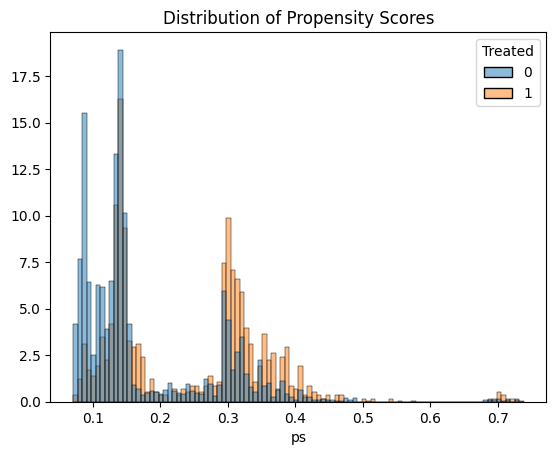

In [10]:
# Verificar graficamente a área de sobreposição
sns.histplot(data=df, x='ps', hue='Treated', bins=100, stat='density', common_norm=False).\
    set(ylabel="", title="Distribution of Propensity Scores");

Agora vamos calcular os pesos IPW para o ATE e ATT.

In [11]:
# Inverse Probability of Treatment Weight (IPTW)

# Peso para o efeito médio do tratamento (ATE)
df['W1'] = 1 / df['ps']
df.loc[df['Treated'] == 0, 'W1'] = 0
df['W2'] = 1 / (1 - df['ps'])
df.loc[df['Treated'] == 1, 'W2'] = 0

# Peso para o efeito médio do tratamento nos tratados (ATT)
df['W_ATE'] = df['W1'] + df['W2']
df['W_ATT'] = df['ps'] / (1 - df['ps'])
df.loc[df['Treated'] == 1, 'W_ATT'] = 1

A título de curiosidade, podemos estimar o efeito médio do tratamento para os tratados (ATT) e o efeito médio do tratamento (ATE) utilizando o método de Ponderação pelo Escore de Propensão (IPW). Para isso, basta rodar a regressão linear considerando como peso amostral os valores de $W_{ATE}$ e $W_{ATT}$, respectivamente.

In [19]:
#Propensity Score Weighting - ATE
psw_ate = smf.wls("Y ~ Treated", weights=df['W_ATE'], data=df).fit()
print(psw_ate.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.040
Model:                            WLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     194.9
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.03e-43
Time:                        21:04:19   Log-Likelihood:                -36594.
No. Observations:                4642   AIC:                         7.319e+04
Df Residuals:                    4640   BIC:                         7.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3401.1645     11.754    289.358      0.0

In [13]:
#Propensity Score Weighting - ATT
psw_att = smf.wls("Y ~ Treated", weights=df['W_ATT'], data=df).fit()
print(psw_att.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.032
Model:                            WLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     155.8
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           3.41e-35
Time:                        16:28:39   Log-Likelihood:                -37060.
No. Observations:                4642   AIC:                         7.412e+04
Df Residuals:                    4640   BIC:                         7.414e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3350.9689     12.014    278.924      0.0

Repare que podemos obter os mesmos resultados utilizando o pacote pyDRReg.

In [17]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

IPW_att = pyDRReg(df, X_vars, T_var, Y_var, method='att', estimator='IPW', n_bootstrap=50, seed=44)

print(IPW_att.summary())

         Metric       Value
0     Estimator         IPW
1        Method         ATT
2      Estimate -213.309168
3  bootstrap_SE   22.839909
4        t-stat   -9.339318
5       p-value         0.0
6      CI Lower -258.075389
7      CI Upper -168.542946


In [15]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

IPW_ate = pyDRReg(df, X_vars, T_var, Y_var, method='ate', estimator='IPW', n_bootstrap=50, seed=44)

print(IPW_ate.summary())

         Metric       Value
0     Estimator         IPW
1        Method         ATE
2      Estimate -234.437125
3  bootstrap_SE   23.479172
4        t-stat   -9.984897
5       p-value         0.0
6      CI Lower -280.456303
7      CI Upper -188.417947


**Estimativa Duplamente Robusta**

Agora temos todos os componentes para estimar o DR para ATE e o ATT, vamos fazer "na mão".

In [17]:
# DR-ATE
DR_ATE = mu1 - mu0 + df["Treated"] / df["ps"] * (df["Y"] - mu1) - (1-df["Treated"]) / (1-df["ps"]) * (df["Y"] - mu0)
print(np.mean(DR_ATE))

-229.19546059542853


In [18]:
# DR-ATT
DR_ATT = mu1 - mu0 + df["Treated"] * (df["Y"] - mu1) - (1-df["Treated"])*df["ps"] / (1-df["ps"]) * (df["Y"] - mu0)
print(np.mean(DR_ATT))

-218.94795582708


Podemos utilizar o pacote pyDRReg para obter os mesmos resultados.

In [22]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

DR_ate = pyDRReg(df, X_vars, T_var, Y_var, method='ate', estimator='DR', n_bootstrap=50, seed=44)

print(DR_ate.summary())

         Metric       Value
0     Estimator          DR
1        Method         ATE
2      Estimate -229.195464
3  bootstrap_SE   23.584023
4        t-stat   -9.718251
5       p-value         0.0
6      CI Lower  -275.42015
7      CI Upper -182.970779


In [23]:
from pyDRReg.pyDRReg import pyDRReg

T_var = 'Treated'
Y_var = 'Y'
X_vars = ['casada', 'mage', 'medu']

DR_att = pyDRReg(df, X_vars, T_var, Y_var, method='att', estimator='DR', n_bootstrap=50, seed=44)

print(DR_att.summary())

         Metric       Value
0     Estimator          DR
1        Method         ATT
2      Estimate -218.947956
3  bootstrap_SE   22.000454
4        t-stat   -9.951974
5       p-value         0.0
6      CI Lower -262.068846
7      CI Upper -175.827066


Esse tipo de estimador é bastante importante na literatura. E já possui alguns estimadores que realizam as estimações de forma direta. Por exemplo, poderíamos computar diretamente com 'LinearDRLearner' da biblioteca 'EconML' da Microsoft (EconML - Estimate causal effects with ML).

obs: https://www.microsoft.com/en-us/research/project/econml/


In [34]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from econml.dr import LinearDRLearner

In [35]:
X = df[['casada', 'mage', 'medu']]

In [36]:
model = LinearDRLearner(model_propensity=LogisticRegression(), 
                        model_regression=LinearRegression(),
                        random_state=1)
model.fit(Y=df["Y"], T=df["Treated"], X=X);

In [37]:
model.ate_inference(X=X.values, T0=0, T1=1).summary().tables[0]

mean_point,stderr_mean,zstat,pvalue,ci_mean_lower,ci_mean_upper
-228.118,23.167,-9.847,0.0,-273.524,-182.712


O modelo nos dá diretamente o efeito médio do tratamento. A estimativa é estatisticamente diferente de zero e o intervalo de confiança inclui o valor verdadeiro de -229,17. Observe que obtivemos uma estimativa diferente porque a função **LinearDRLearner** também realizou o cross-fitting em segundo plano, o que não fizemos antes. Ele não calcula o ATT.

Outro pacote importante é o "causalml" (https://causalml.readthedocs.io/en/latest/about.html).



## Boas práticas

* Verifique o balanço das covariáveis.
  * Tanto o IPW quanto o DR (AIPW) foram desenvolvidos para ambientes nos quais o tratamento não é atribuído aleatoriamente incondicionalmente, mas pode depender de algumas variáveis observáveis. Essas informações podem ser verificadas de duas maneiras: 
    * (1) Produza uma tabela de médias/equilíbrio das covariáveis. Se a randomização incondicional não for válida, esperamos ver diferenças significativas entre alguns observáveis; 
    * (2) Trace os escores de propensão estimados. Se a randomização incondicional for válida, esperamos que os escores de propensão sejam constantes.
* Verifique a suposição de sobreposição.
  * Podemos simplesmente verificar os limites dos escores de propensão previstos. Se a suposição de sobreposição for violada, acabamos dividindo algum termo do estimador por zero.
